# Problème RP8 
## Dans ce Notebook, nous traitons le problème RP8 de BBRC 2019 en utilisant la méthode FORM SORM et la méthode de Monte Carlo

In [1]:
import openturns as ot
import numpy as np

In [2]:
a = [4.783, 4.783, 4.783, 4.783, 3.892, 3.669]
b = [0.09975, 0.09975, 0.09975, 0.09975, 0.198, 0.198]

Nous définissons les paramètres des entrées

In [3]:
X0 = ot.LogNormal(a[0], b[0], 0)
X1 = ot.LogNormal(a[1], b[1], 0)
X2 = ot.LogNormal(a[2], b[2], 0)
X3 = ot.LogNormal(a[3], b[3], 0)
X4 = ot.LogNormal(a[4], b[4], 0)
X5 = ot.LogNormal(a[5], b[5], 0)

In [4]:
Y = X0 + 2 * X1 + 2 * X2 + X3 - 5 * X4 - 5 * X5

In [5]:
Y.computeCDF(0.0)

0.0007733651721137447

Nous traitons le cas suivants 

$
\left\{
    \begin{array}{ll}
        g(X) = X_0 + 2X_1 + 2X_2 +X_3 - 5X_4 - 5X_5  \\
        g(X) = 0 \\
        x_1 = E(X_1) \\ 
        X_2 = 0 \\
        X_3 = 0 \\
        X_5 = 0
    \end{array}
\right.
$
$
\\
\Rightarrow
\\
$
$
\left\{
    \begin{array}{ll}
        X_0 = 5X_4 \\
        X_1 = 0 \\ 
        X_2 = 0 \\
        X_3 = 0 \\
        X_5 = 0
    \end{array}
\right.
$

Nous transformons les entrées X0 et X4 dans l'espace standard,


$
\left\{
    \begin{array}{ll}
        g(X) = X_0 - 5X_4  \\
        g(X) = 0 
        \\
    \end{array}
\right.
$

On pose :

$
\left\{
    \begin{array}{ll}
        R = X_0   \\
        S = 5X_4 
        \\
    \end{array}
\right.
$

Alors:

$
\left\{
    \begin{array}{ll}
        µ_R = µ_{X_0}   \\
        µ_S = 5µ_{X_4} 
        \\
    \end{array}
\right.
$

Et:

$
\left\{
    \begin{array}{ll}
        \sigma_R = \sigma_{X_0}   \\
        \sigma_S = 5\sigma_{X_4} 
        \\
    \end{array}
\right.
$

On fait la transformation dans l'espace standard:

$
\left\{
    \begin{array}{ll}
        R = X_0   \\
        S = 5X_4 
        \\
    \end{array}
\right.
$
$
\\
\Rightarrow
\\
$
$
\left\{
    \begin{array}{ll}
        U = \frac{R-µ_R}{\sigma_R}   \\
        V = \frac{S-µ_S}{\sigma_S}
        \\
    \end{array}
\right.
$

In [6]:
# moyen de X0
mu0 = 12
# moyen de X4
mu4 = 5
# écart type de X0
sigma0 = 12
# écart typre de X4
sigma4 = 10

In [7]:
U1 = (X0 - mu0) / sigma0
U2 = (X4 - mu4) / sigma4

In [8]:
x1 = U1.getSample(5000)
y1 = U2.getSample(5000)

On declare deux cercles des iso-probable

$f_{R S}(u, v)=\frac{1}{2 \pi \sigma_{R} \sigma_{s}} \exp \left\{-\frac{1}{2}\left[u^{2}+v^{2}\right]\right\}$

Nous calculons les rayons des courbes iso-probables pour deux constantes
$\alpha1 = 0.00001$ et $\alpha2 = 0.000001$ 

$f_{R S}(u, v) = \alpha1$ 

$f_{R S}(u, v) = \alpha2$ 

In [9]:
alpha1 = 0.00001
alpha2 = 0.000001

Les rayons des cercles :
$r^2  = u^2+ v^2$

In [10]:
p = -2 * np.log(2 * np.pi * alpha1 * 5 * sigma0 * sigma4)
q = -2 * np.log(2 * np.pi * alpha2 * 5 * sigma0 * sigma4)

In [11]:
theta = np.linspace(0, 2 * np.pi, 100)

rp = np.sqrt(p)

xp = rp * np.cos(theta)
yp = rp * np.sin(theta)

rq = np.sqrt(q)

xq = rq * np.cos(theta)
yq = rq * np.sin(theta)

On défint la fonction de $g(x)=0$ 

Ce qui équivalent à :

$g=G(u, v)=\sigma_{R} u-\sigma_{S} v+\left(\mu_{R}-\mu_{S}\right)$

In [12]:
def h(x):
    m = (sigma0 * x + (5 * mu4 - mu0)) / (5 * sigma4)
    return m

In [13]:
x2 = np.arange(-5, 15, 1)

y2 = h(x2)

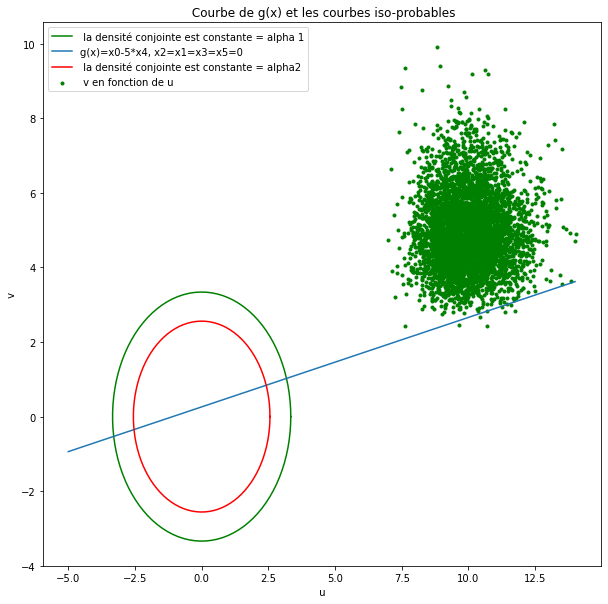

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(x1, y1, c="green", marker=".", label=" v en fonction de u ")
plt.plot(xq, yq, c="green", label=" la densité conjointe est constante = alpha 1")
plt.plot(x2, y2, label="g(x)=x0-5*x4, x2=x1=x3=x5=0")
plt.plot(xp, yp, c="red", label=" la densité conjointe est constante = alpha2")
plt.xlabel(" u ")
plt.ylabel(" v ")
plt.title(" Courbe de g(x) et les courbes iso-probables")
plt.legend(loc="best")
plt.show()

Nous définissons la fonction de performance 

In [15]:
def f(x):
    g = x[0] + 2 * x[1] + 2 * x[2] + x[3] - 5 * x[4] - 5 * x[5]
    y = [g]
    return y

In [16]:
myDistribution = ot.ComposedDistribution([X0, X1, X2, X3, X4, X5])

In [17]:
mu = myDistribution.getMean()

In [18]:
myFunction = ot.PythonFunction(6, 1, f)

In [19]:
vect = ot.RandomVector(myDistribution)
output = ot.CompositeRandomVector(myFunction, vect)
event = ot.ThresholdEvent(output, ot.Less(), 0)

In [20]:
# Methode FORM
solver = ot.AbdoRackwitz()
algo = ot.FORM(solver, event, mu)
algo.run()
result = algo.getResult()

In [21]:
result.getEventProbability()

0.0006459604410752057

In [22]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

93

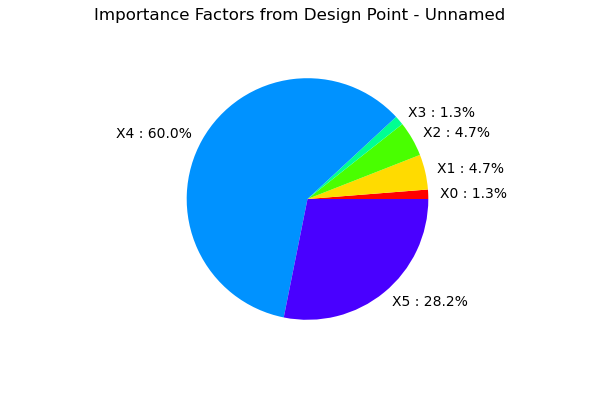

In [23]:
result.drawImportanceFactors()

In [24]:
# Méthode importance sampling
standardSpaceDesignPoint = result.getStandardSpaceDesignPoint()
myImportance = ot.Normal(standardSpaceDesignPoint, [1.0] * 6, ot.CorrelationMatrix(6))
experiment = ot.ImportanceSamplingExperiment(myImportance)
algo = ot.ProbabilitySimulationAlgorithm(ot.StandardEvent(event), experiment)
algo.setMaximumCoefficientOfVariation(0.1)
algo.setMaximumOuterSampling(40000)
algo.setConvergenceStrategy(ot.Full())
algo.run()

In [25]:
result = algo.getResult()
result.getProbabilityEstimate()

0.0007387051349426183

In [26]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

531

In [27]:
# Méthode SORM
solver = ot.AbdoRackwitz()
algo = ot.SORM(solver, event, mu)
algo.run()
result = algo.getResult()

In [28]:
result.getEventProbabilityBreitung()

0.0007674045156099532

In [29]:
# Nombre d'appel à la fonction f
myFunction.getEvaluationCallsNumber()

721

In [30]:
# Méthode de Monte Carlo
experiment = ot.MonteCarloExperiment()
algo = ot.ProbabilitySimulationAlgorithm(event, experiment)
algo.setMaximumCoefficientOfVariation(0.05)
algo.setMaximumOuterSampling(int(1e5))
algo.run()
result = algo.getResult()
probability = result.getProbabilityEstimate()

In [31]:
probability

0.0009299999999999981

In [32]:
# Nombre d'appel à la fonction
myFunction.getEvaluationCallsNumber()

100721